In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# View the shape of the data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


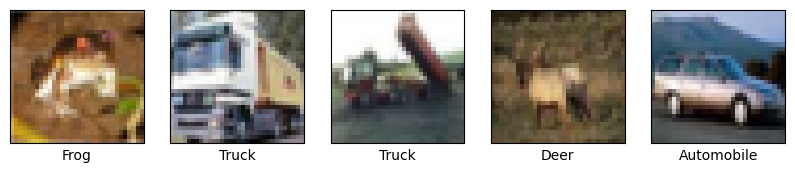

In [4]:
# Define class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display the first 5 images from the training set
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
# Create a sequential model
model = models.Sequential()

# Add convolutional layers, followed by pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3562 - loss: 1.7562 - val_accuracy: 0.5486 - val_loss: 1.2468
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5770 - loss: 1.1960 - val_accuracy: 0.6244 - val_loss: 1.0549
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6407 - loss: 1.0203 - val_accuracy: 0.6683 - val_loss: 0.9497
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6867 - loss: 0.8965 - val_accuracy: 0.6665 - val_loss: 0.9543
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7090 - loss: 0.8351 - val_accuracy: 0.6918 - val_loss: 0.8864
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7264 - loss: 0.7755 - val_accuracy: 0.7052 - val_loss: 0.8549
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7505 - loss: 0.7189 - val_accuracy: 0.6954 - val_loss: 0.8712
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7691 - loss: 0.6624 

In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.7098 - loss: 0.8697

Test accuracy: 0.7098000049591064


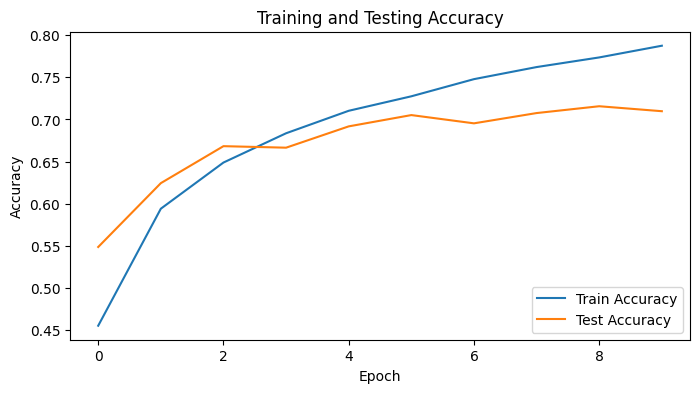

In [10]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')
plt.show()

In [11]:
# Add a softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([
    model,
    layers.Softmax()
])

# Predict on the test dataset
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


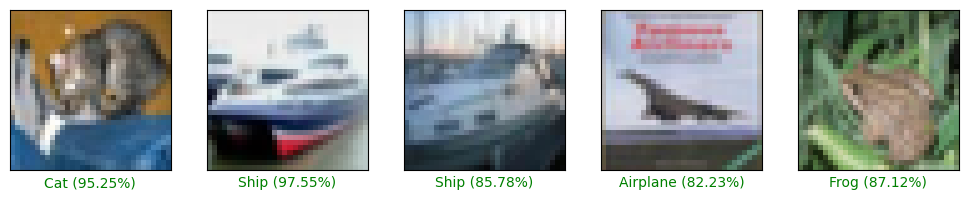

In [12]:
# Function to plot image with predicted and true label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = predictions_array.argmax()
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100 * predictions_array[predicted_label]:.2f}%)",
               color=color)

# Plot the first 5 test images with their predicted labels
num_rows = 1
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()

In [13]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)

In [14]:
# Define a more complex model
model_aug = models.Sequential()

model_aug.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.3))

model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.4))

model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(256, activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.Dropout(0.5))
model_aug.add(layers.Dense(10))

# Compile the model
model_aug.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [20]:
# Train the model with data augmentation
epochs = 10
history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=64),
                            steps_per_epoch=int(len(x_train) / 64), epochs=epochs,
                            validation_data=(x_test, y_test))

Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7603 - loss: 0.6920 - val_accuracy: 0.7690 - val_loss: 0.6689
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7969 - loss: 0.6050 - val_accuracy: 0.7700 - val_loss: 0.6668
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7658 - loss: 0.6764 - val_accuracy: 0.7774 - val_loss: 0.6651
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.8125 - loss: 0.6853 - val_accuracy: 0.7780 - val_loss: 0.6621
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7743 - loss: 0.6578 - val_accuracy: 0.7653 - val_loss: 0.7047
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.8125 - loss: 0.4817 - val_accuracy: 0.7588 - val_loss: 0.7276
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7760 - loss: 0.6470 - val_accuracy: 0.7863 - val_loss: 0.6420
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7969 - loss: 0.7167 - va

In [21]:
# Evaluate the augmented model
test_loss_aug, test_acc_aug = model_aug.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy after augmentation: {test_acc_aug}')

313/313 - 1s - 3ms/step - accuracy: 0.7596 - loss: 0.7095

Test accuracy after augmentation: 0.7595999836921692


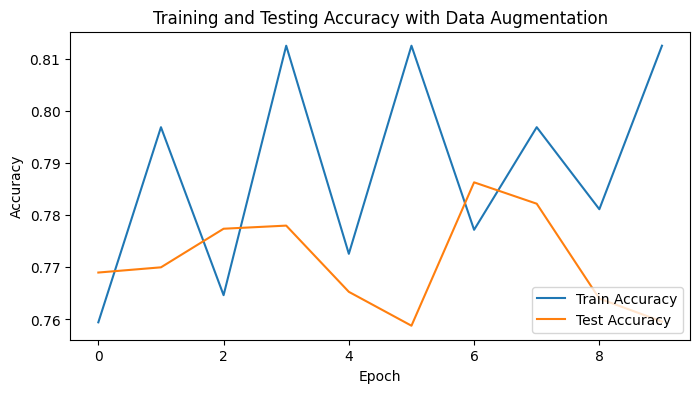

In [22]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 4))
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy with Data Augmentation')
plt.show()